**Q:** **what regularization techniques were mentioned in that Jupyter notebook?**

Ans:
1.L1 regularization – applies the L1 norm to the model’s weights to encourage sparsity.

2. L2 regularization – uses the L2 norm (also known as weight decay) to penalize large weights.

3. L1_L2 regularization – combines both L1 and L2 penalties using Keras weight regularizers.

4. Dropout layers – a powerful regularization method that randomly disables neurons during training.


**Creating new dataset**


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Observing  training and testing data**

In [3]:
print("Class distribution in the training set:")
for label in np.unique(train_labels):
    count = np.sum(train_labels == label)
    print(f"Number of {label}s: {count}")


Class distribution in the training set:
Number of 0s: 5923
Number of 1s: 6742
Number of 2s: 5958
Number of 3s: 6131
Number of 4s: 5842
Number of 5s: 5421
Number of 6s: 5918
Number of 7s: 6265
Number of 8s: 5851
Number of 9s: 5949


In [4]:
print("Class distribution in the test set:")
for label in np.unique(test_labels):
    count = np.sum(test_labels == label)
    print(f"Number of {label}s: {count}")


Class distribution in the test set:
Number of 0s: 980
Number of 1s: 1135
Number of 2s: 1032
Number of 3s: 1010
Number of 4s: 982
Number of 5s: 892
Number of 6s: 958
Number of 7s: 1028
Number of 8s: 974
Number of 9s: 1009


**Numpy array for whole new dataset**

In [5]:
# Preparing new containers for a subset of the dataset
new_train_images = np.empty(shape=(30000, 28, 28), dtype=np.uint8)
new_train_labels = np.empty(shape=(30000,), dtype=int)

new_test_images = np.empty(shape=(5000, 28, 28), dtype=np.uint8)
new_test_labels = np.empty(shape=(5000,), dtype=int)


In [6]:
Ntn = 60000
N_trn_each = 6000

_data_vars = {
    "new_train_01": (N_trn_each, 28, 28),
    "new_train_lbl_0": (N_trn_each,),
    "new_train_23": (N_trn_each, 28, 28),
    "new_train_lbl_1": (N_trn_each,),
    "new_train_45": (N_trn_each, 28, 28),
    "new_train_lbl_2": (N_trn_each,),
    "new_train_67": (N_trn_each, 28, 28),
    "new_train_lbl_3": (N_trn_each,),
    "new_train_89": (N_trn_each, 28, 28),
    "new_train_lbl_4": (N_trn_each,)
}

for var_name, shape in _data_vars.items():
    globals()[var_name] = np.empty(shape, dtype=np.uint8 if 'lbl' not in var_name else int)


In [7]:
# Count the number of samples for each label (0 through 9)
counts = [np.count_nonzero(train_labels == i) for i in range(10)]

# Initialize empty arrays for each digit class
new_train_0 = np.empty((counts[0], 28, 28), dtype=np.uint8)
new_train_1 = np.empty((counts[1], 28, 28), dtype=np.uint8)
new_train_2 = np.empty((counts[2], 28, 28), dtype=np.uint8)
new_train_3 = np.empty((counts[3], 28, 28), dtype=np.uint8)
new_train_4 = np.empty((counts[4], 28, 28), dtype=np.uint8)
new_train_5 = np.empty((counts[5], 28, 28), dtype=np.uint8)
new_train_6 = np.empty((counts[6], 28, 28), dtype=np.uint8)
new_train_7 = np.empty((counts[7], 28, 28), dtype=np.uint8)
new_train_8 = np.empty((counts[8], 28, 28), dtype=np.uint8)
new_train_9 = np.empty((counts[9], 28, 28), dtype=np.uint8)

# Index trackers for each label's array
indices = [0] * 10  # c_0 through c_9 replaced by list for simplicity

# Distribute train images into respective label arrays
for i in range(Ntn):
    label = train_labels[i]
    if label >= 0 and label <= 9:
        if label == 0:
            new_train_0[indices[0]] = train_images[i]
            indices[0] += 1
        elif label == 1:
            new_train_1[indices[1]] = train_images[i]
            indices[1] += 1
        elif label == 2:
            new_train_2[indices[2]] = train_images[i]
            indices[2] += 1
        elif label == 3:
            new_train_3[indices[3]] = train_images[i]
            indices[3] += 1
        elif label == 4:
            new_train_4[indices[4]] = train_images[i]
            indices[4] += 1
        elif label == 5:
            new_train_5[indices[5]] = train_images[i]
            indices[5] += 1
        elif label == 6:
            new_train_6[indices[6]] = train_images[i]
            indices[6] += 1
        elif label == 7:
            new_train_7[indices[7]] = train_images[i]
            indices[7] += 1
        elif label == 8:
            new_train_8[indices[8]] = train_images[i]
            indices[8] += 1
        elif label == 9:
            new_train_9[indices[9]] = train_images[i]
            indices[9] += 1

# Creating paired training sets by averaging random pairs of images from specified label groups
for j in range(N_trn_each):
    r0 = random.randrange(counts[0])
    r1 = random.randrange(counts[1])
    new_train_01[j] = (new_train_0[r0].astype(np.float32) + new_train_1[r1].astype(np.float32)) / 2
    new_train_lbl_0[j] = 0

    r2 = random.randrange(counts[2])
    r3 = random.randrange(counts[3])
    new_train_23[j] = (new_train_2[r2].astype(np.float32) + new_train_3[r3].astype(np.float32)) / 2
    new_train_lbl_1[j] = 1

    r4 = random.randrange(counts[4])
    r5 = random.randrange(counts[5])
    new_train_45[j] = (new_train_4[r4].astype(np.float32) + new_train_5[r5].astype(np.float32)) / 2
    new_train_lbl_2[j] = 2

    r6 = random.randrange(counts[6])
    r7 = random.randrange(counts[7])
    new_train_67[j] = (new_train_6[r6].astype(np.float32) + new_train_7[r7].astype(np.float32)) / 2
    new_train_lbl_3[j] = 3

    r8 = random.randrange(counts[8])
    r9 = random.randrange(counts[9])
    new_train_89[j] = (new_train_8[r8].astype(np.float32) + new_train_9[r9].astype(np.float32)) / 2
    new_train_lbl_4[j] = 4

# Optional: convert paired images back to uint8 if needed
new_train_01 = new_train_01.astype(np.uint8)
new_train_23 = new_train_23.astype(np.uint8)
new_train_45 = new_train_45.astype(np.uint8)
new_train_67 = new_train_67.astype(np.uint8)
new_train_89 = new_train_89.astype(np.uint8)


Visualization randomly selected two images from training data

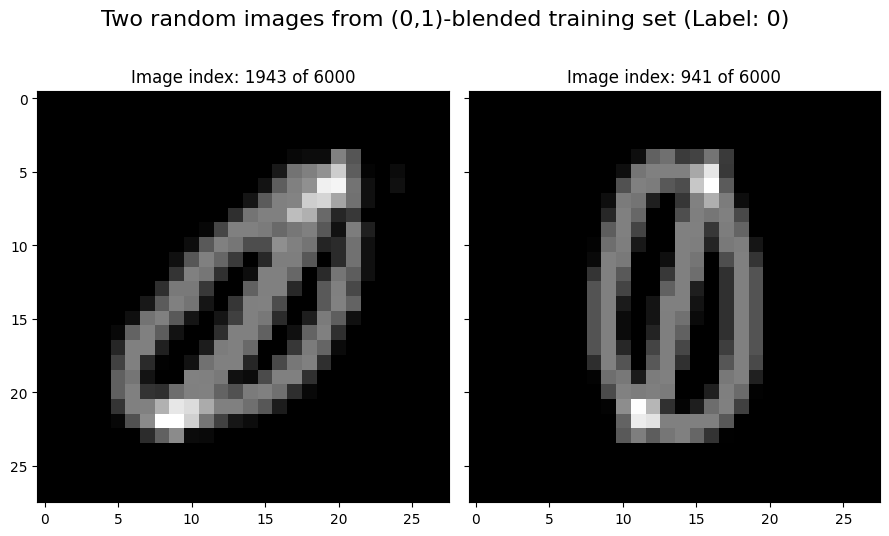

In [8]:
# Randomly pick two different indices from the 0-1 paired training set
idx1 = random.randint(0, N_trn_each - 1)
idx2 = random.randint(0, N_trn_each - 1)

# Fetch the corresponding images
image1 = new_train_01[idx1]
image2 = new_train_01[idx2]

# Plotting the selected images side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

ax1.imshow(image1, cmap='gray', interpolation='nearest')
ax1.set_title(f"Image index: {idx1} of {N_trn_each}")

ax2.imshow(image2, cmap='gray', interpolation='nearest')
ax2.set_title(f"Image index: {idx2} of {N_trn_each}")

plt.suptitle("Two random images from (0,1)-blended training set (Label: 0)", y=0.8, fontsize=16)
plt.tight_layout()
plt.show()


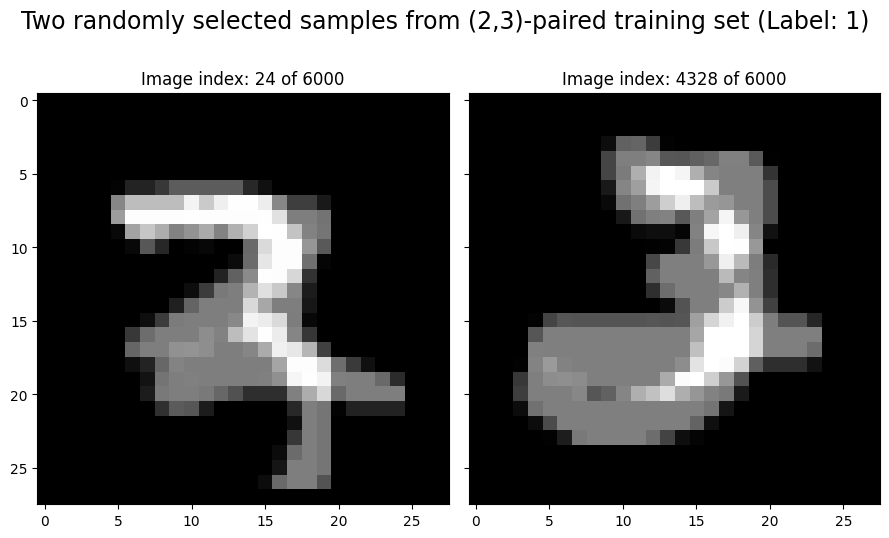

In [9]:
# Randomly select two different indices
idx_a = random.randint(0, N_trn_each - 1)
idx_b = random.randint(0, N_trn_each - 1)

# Retrieve the images from the (2,3)-paired training set
image_a = new_train_23[idx_a]
image_b = new_train_23[idx_b]

# Display the selected images side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

ax1.imshow(image_a, cmap='gray', interpolation='nearest')
ax1.set_title(f"Image index: {idx_a} of {N_trn_each}")

ax2.imshow(image_b, cmap='gray', interpolation='nearest')
ax2.set_title(f"Image index: {idx_b} of {N_trn_each}")

plt.suptitle("Two randomly selected samples from (2,3)-paired training set (Label: 1)", y=0.8, fontsize=17)
plt.tight_layout()
plt.show()


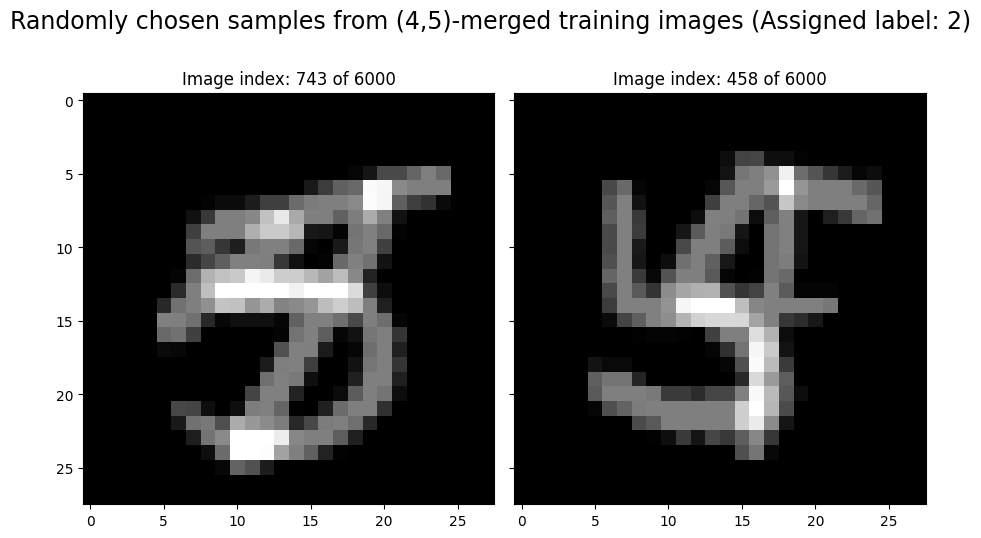

In [10]:
# Select two random indices from the (4,5)-paired set
index1 = random.randint(0, N_trn_each - 1)
index2 = random.randint(0, N_trn_each - 1)

# Retrieve the corresponding images
image1 = new_train_45[index1]
image2 = new_train_45[index2]

# Create a side-by-side plot of the selected images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

ax1.imshow(image1, cmap='gray', interpolation='nearest')
ax1.set_title(f"Image index: {index1} of {N_trn_each}")

ax2.imshow(image2, cmap='gray', interpolation='nearest')
ax2.set_title(f"Image index: {index2} of {N_trn_each}")

plt.suptitle("Randomly chosen samples from (4,5)-merged training images (Assigned label: 2)", y=0.8, fontsize=17)
plt.tight_layout()
plt.show()


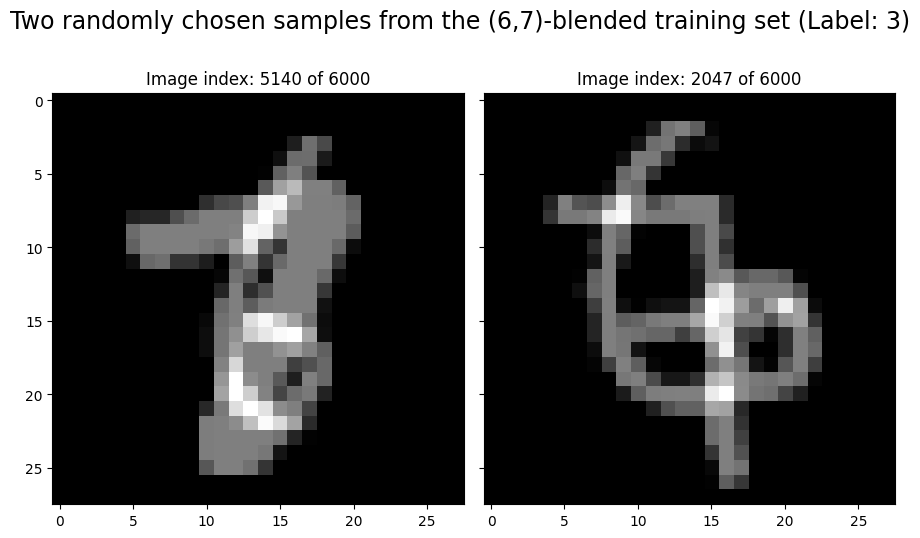

In [11]:
# Random selection from the (6,7)-paired training set
idx_1 = random.randint(0, N_trn_each - 1)
idx_2 = random.randint(0, N_trn_each - 1)

# Retrieve selected images
img_1 = new_train_67[idx_1]
img_2 = new_train_67[idx_2]

# Display both images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

ax1.imshow(img_1, cmap='gray', interpolation='nearest')
ax1.set_title(f"Image index: {idx_1} of {N_trn_each}")

ax2.imshow(img_2, cmap='gray', interpolation='nearest')
ax2.set_title(f"Image index: {idx_2} of {N_trn_each}")

plt.suptitle("Two randomly chosen samples from the (6,7)-blended training set (Label: 3)", y=0.8, fontsize=17)
plt.tight_layout()
plt.show()


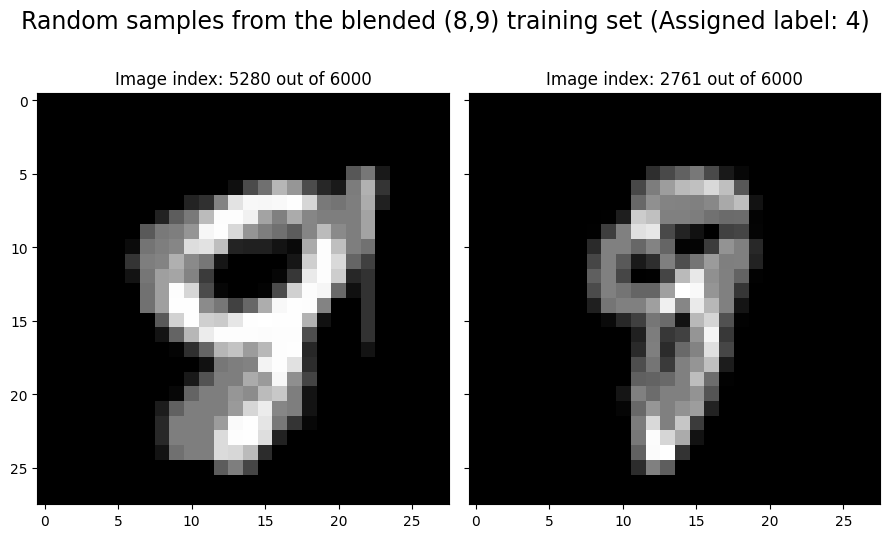

In [12]:
# Random indices from the (8,9) merged training images
idx1 = random.randint(0, N_trn_each - 1)
idx2 = random.randint(0, N_trn_each - 1)

# Extract the corresponding images
img1 = new_train_89[idx1]
img2 = new_train_89[idx2]

# Set up the side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

ax1.imshow(img1, cmap='gray', interpolation='nearest')
ax1.set_title(f"Image index: {idx1} out of {N_trn_each}")

ax2.imshow(img2, cmap='gray', interpolation='nearest')
ax2.set_title(f"Image index: {idx2} out of {N_trn_each}")

plt.suptitle("Random samples from the blended (8,9) training set (Assigned label: 4)", y=0.8, fontsize=17)
plt.tight_layout()
plt.show()


**testing dataset**

In [13]:
# Total test samples and number per paired group
Ntt = 10000
N_tst_each = 1000

# Initialize empty arrays for images and labels of each digit pair group
new_test_01 = np.empty((N_tst_each, 28, 28), dtype=np.uint8)
new_test_lbl_0 = np.empty((N_tst_each,))

new_test_23 = np.empty((N_tst_each, 28, 28), dtype=np.uint8)
new_test_lbl_1 = np.empty((N_tst_each,))

new_test_45 = np.empty((N_tst_each, 28, 28), dtype=np.uint8)
new_test_lbl_2 = np.empty((N_tst_each,))

new_test_67 = np.empty((N_tst_each, 28, 28), dtype=np.uint8)
new_test_lbl_3 = np.empty((N_tst_each,))

new_test_89 = np.empty((N_tst_each, 28, 28), dtype=np.uint8)
new_test_lbl_4 = np.empty((N_tst_each,))


In [17]:
# Count images per label
counts = {k: np.count_nonzero(test_labels == k) for k in range(10)}

# Create empty arrays for each label
new_test = {k: np.empty((counts[k], 28, 28), dtype=np.uint8) for k in range(10)}

# Counters for each label
counters = {k: 0 for k in range(10)}

# Fill new_test arrays without explicit repeated if/elif
for i in range(Ntt):
    label = test_labels[i]
    new_test[label][counters[label]] = test_images[i]
    counters[label] += 1

# Pre-allocate paired test arrays and labels
paired_data = {
    0: (new_test[0], new_test[1], new_test_01, new_test_lbl_0),
    1: (new_test[2], new_test[3], new_test_23, new_test_lbl_1),
    2: (new_test[4], new_test[5], new_test_45, new_test_lbl_2),
    3: (new_test[6], new_test[7], new_test_67, new_test_lbl_3),
    4: (new_test[8], new_test[9], new_test_89, new_test_lbl_4),
}

for key, (arr1, arr2, paired_arr, lbl_arr) in paired_data.items():
    # Random indices for both classes
    idx1 = np.random.randint(0, arr1.shape[0], N_tst_each)
    idx2 = np.random.randint(0, arr2.shape[0], N_tst_each)

    # Average images with float conversion and cast back to uint8
    paired_arr[:] = ((arr1[idx1].astype(np.float32) + arr2[idx2].astype(np.float32)) / 2).astype(np.uint8)
    lbl_arr[:] = key


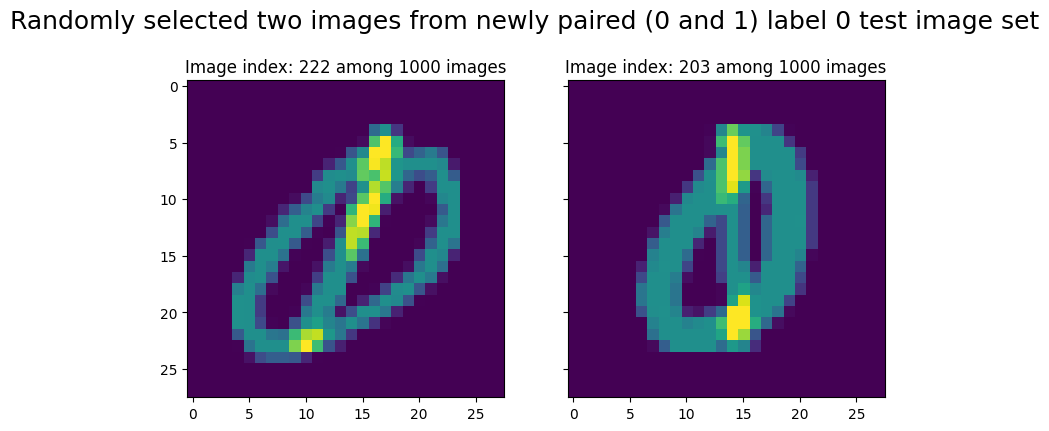

In [18]:
def plot_random_paired_images(paired_images, N_images, label_desc):
    r_0 = random.randrange(N_images)
    r_1 = random.randrange(N_images)
    img_1 = paired_images[r_0]
    img_2 = paired_images[r_1]

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 9))
    ax1.imshow(img_1, interpolation='nearest')
    ax1.set_title(f'Image index: {r_0} among {N_images} images')
    ax2.imshow(img_2, interpolation='nearest')
    ax2.set_title(f'Image index: {r_1} among {N_images} images')
    plt.suptitle(f"Randomly selected two images from newly paired {label_desc} test image set", y=.75, fontsize=18)
    plt.show()

# Usage example:
plot_random_paired_images(new_test_01, N_tst_each, "(0 and 1) label 0")


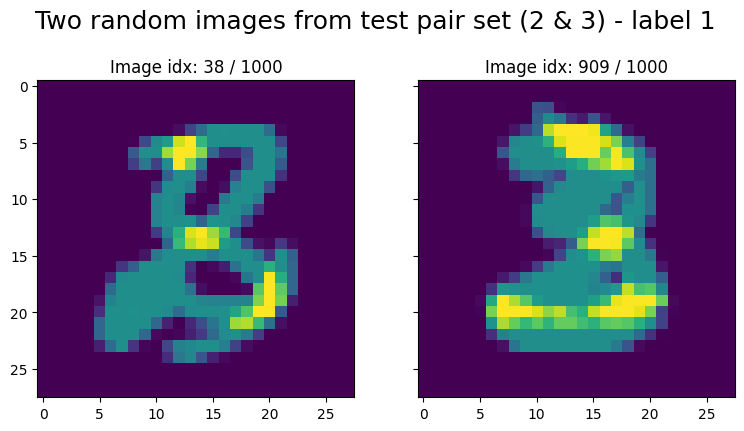

In [19]:
idx_a = random.randint(0, N_tst_each - 1)
idx_b = random.randint(0, N_tst_each - 1)

image_a = new_test_23[idx_a]
image_b = new_test_23[idx_b]

fig, axes = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

axes[0].imshow(image_a, interpolation='nearest')
axes[0].set_title(f'Image idx: {idx_a} / {N_tst_each}')

axes[1].imshow(image_b, interpolation='nearest')
axes[1].set_title(f'Image idx: {idx_b} / {N_tst_each}')

fig.suptitle("Two random images from test pair set (2 & 3) - label 1", fontsize=18, y=0.75)

plt.show()


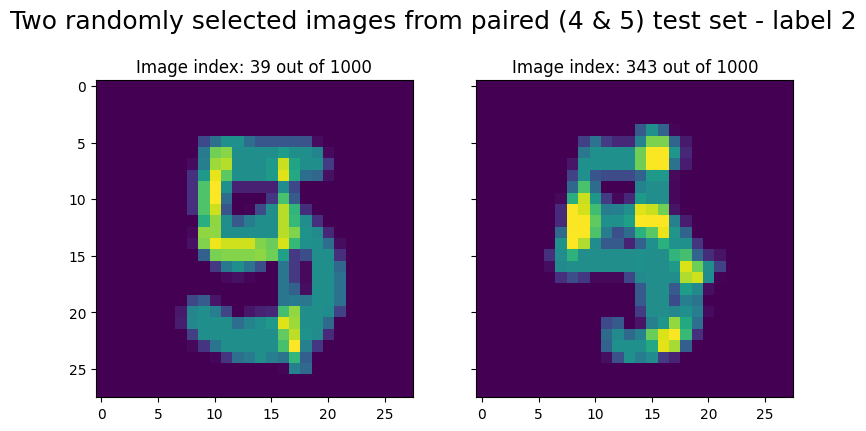

In [20]:
index_1 = random.randint(0, N_tst_each - 1)
index_2 = random.randint(0, N_tst_each - 1)

image_1 = new_test_45[index_1]
image_2 = new_test_45[index_2]

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

plot1.imshow(image_1, interpolation='nearest')
plot1.set_title(f'Image index: {index_1} out of {N_tst_each}')

plot2.imshow(image_2, interpolation='nearest')
plot2.set_title(f'Image index: {index_2} out of {N_tst_each}')

fig.suptitle("Two randomly selected images from paired (4 & 5) test set - label 2", fontsize=18, y=0.75)

plt.show()


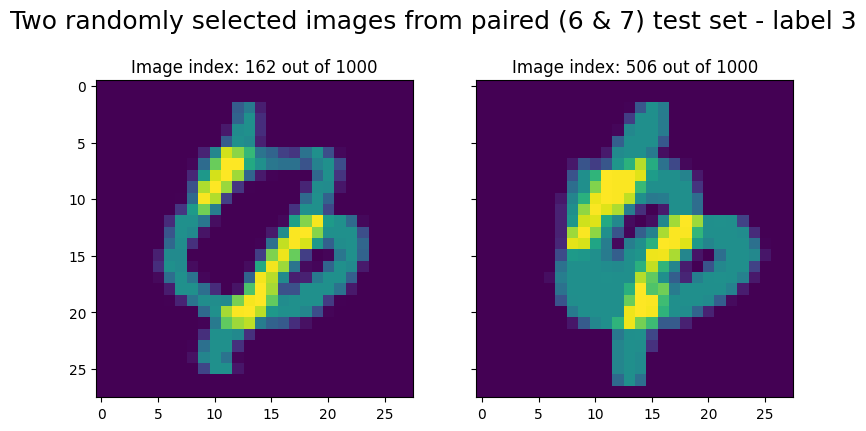

In [21]:
idx_a = random.randint(0, N_tst_each - 1)
idx_b = random.randint(0, N_tst_each - 1)

image_a = new_test_67[idx_a]
image_b = new_test_67[idx_b]

fig, (subplot1, subplot2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

subplot1.imshow(image_a, interpolation='nearest')
subplot1.set_title(f'Image index: {idx_a} out of {N_tst_each}')

subplot2.imshow(image_b, interpolation='nearest')
subplot2.set_title(f'Image index: {idx_b} out of {N_tst_each}')

fig.suptitle("Two randomly selected images from paired (6 & 7) test set - label 3", fontsize=18, y=0.75)

plt.show()


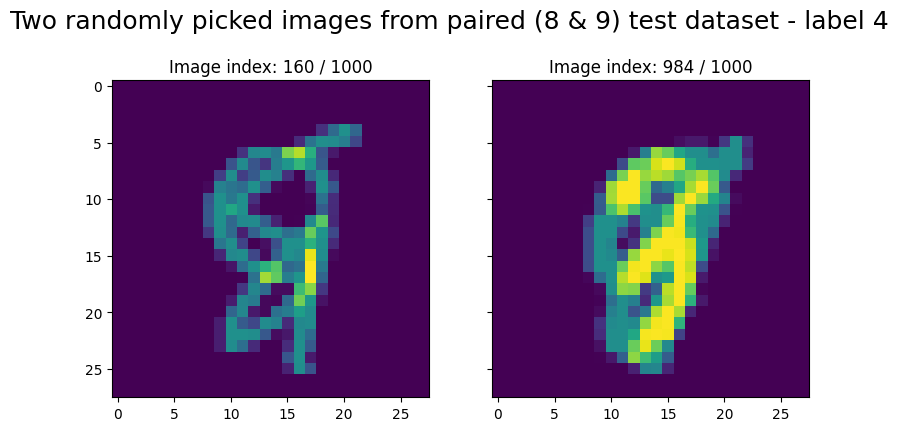

In [22]:
index1 = random.randint(0, N_tst_each - 1)
index2 = random.randint(0, N_tst_each - 1)

image_one = new_test_89[index1]
image_two = new_test_89[index2]

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(9, 9), sharex=True, sharey=True)

plot1.imshow(image_one, interpolation='nearest')
plot1.set_title(f'Image index: {index1} / {N_tst_each}')

plot2.imshow(image_two, interpolation='nearest')
plot2.set_title(f'Image index: {index2} / {N_tst_each}')

fig.suptitle("Two randomly picked images from paired (8 & 9) test dataset - label 4", fontsize=18, y=0.75)

plt.show()


**Optimized Model creation**



In [23]:
# Combine the training image groups into a single NumPy array
combined_train_images = np.concatenate([new_train_01, new_train_23, new_train_45, new_train_67, new_train_89])

# Combine the corresponding labels into a single array
combined_train_labels = np.concatenate([new_train_lbl_0, new_train_lbl_1, new_train_lbl_2, new_train_lbl_3, new_train_lbl_4])

# Shuffle the combined dataset and labels together
shuffled_images, shuffled_labels = shuffle(combined_train_images, combined_train_labels)


In [24]:
# Concatenate all test image arrays into one
combined_test_images = np.concatenate([new_test_01, new_test_23, new_test_45, new_test_67, new_test_89])

# Concatenate all test label arrays into one
combined_test_labels = np.concatenate([new_test_lbl_0, new_test_lbl_1, new_test_lbl_2, new_test_lbl_3, new_test_lbl_4])

# Shuffle the combined test dataset and labels together
shuffled_test_images, shuffled_test_labels = shuffle(combined_test_images, combined_test_labels)


In [25]:
# Normalize and reshape the combined and shuffled training images
train_images_norm = shuffled_images.reshape((shuffled_images.shape[0], 28 * 28)).astype("float32") / 255.0

# Normalize and reshape the combined and shuffled test images
test_images_norm = shuffled_test_images.reshape((shuffled_test_images.shape[0], 28 * 28)).astype("float32") / 255.0

# Split normalized training data into training and validation sets without reshuffling
# (since shuffled_images and shuffled_labels are already shuffled)
x_train, x_valid, y_train, y_valid = train_test_split(
    train_images_norm, shuffled_labels, test_size=0.30, shuffle=False
)


In [26]:

def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    return model

def compile_and_train(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=256):
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size)
    return history

# Build model
model = build_model()

# Train model
history = compile_and_train(model, x_train, y_train, x_valid, y_valid)

# Show keys in history
print(history.history.keys())


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.3146 - loss: 1.4658 - val_accuracy: 0.9079 - val_loss: 0.4163
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7831 - loss: 0.6040 - val_accuracy: 0.9481 - val_loss: 0.1974
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9165 - loss: 0.3051 - val_accuracy: 0.9593 - val_loss: 0.1709
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9364 - loss: 0.2418 - val_accuracy: 0.9653 - val_loss: 0.1433
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9511 - loss: 0.1931 - val_accuracy: 0.9529 - val_loss: 0.2039
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9537 - loss: 0.1983 - val_accuracy: 0.9686 - val_loss: 0.1298
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9639 - loss: 0.1575 - val_accuracy: 0.9704 - val_loss: 0.1338
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9664 - loss: 0.1497 - val_accuracy: 0.9719 - val_los

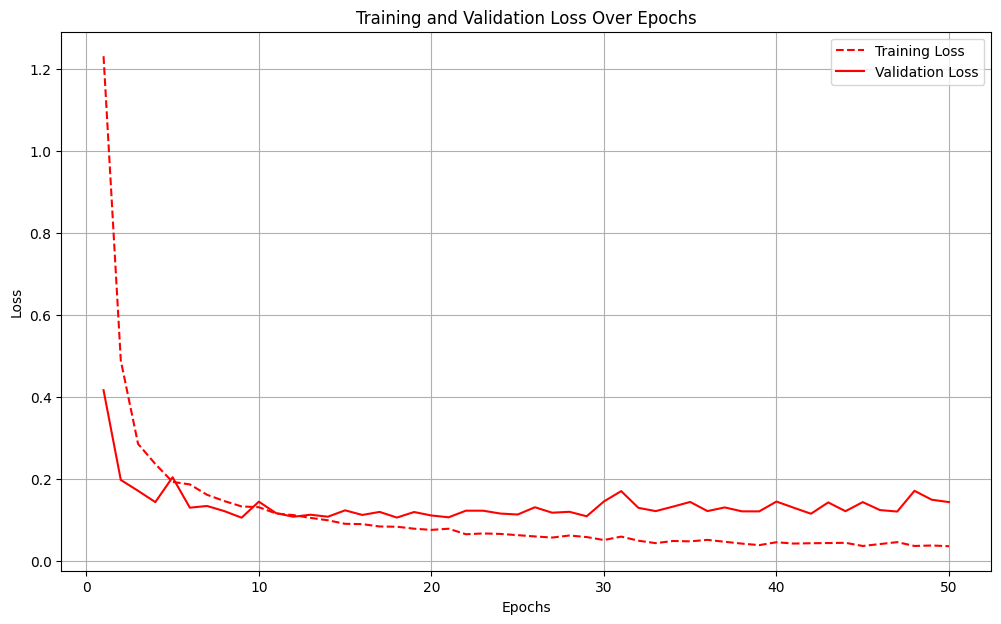

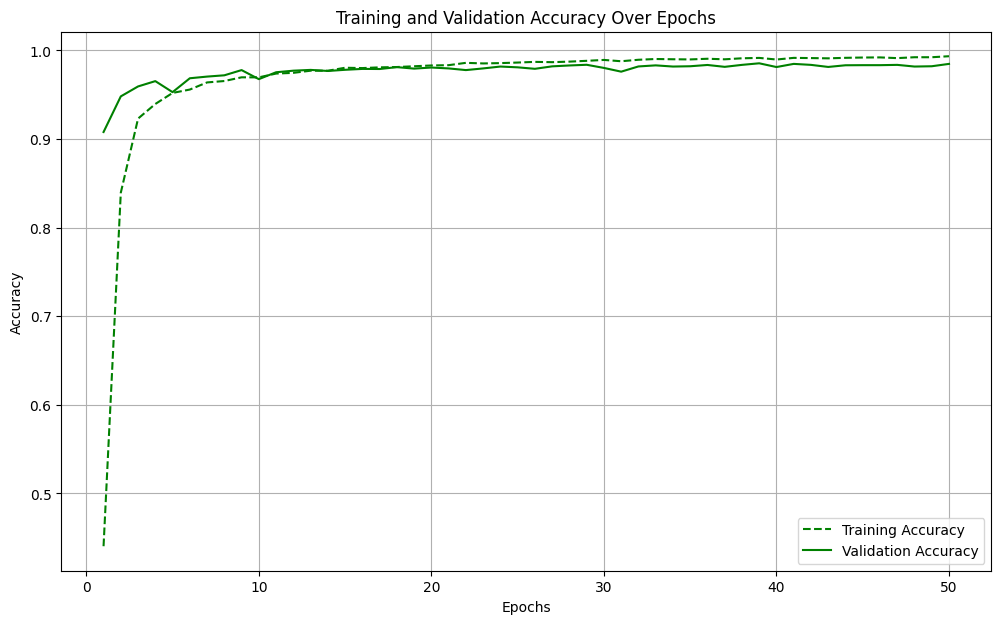

In [27]:
# Extract metrics from training history
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

num_epochs = len(train_loss)
epoch_range = range(1, num_epochs + 1)

# Plot Loss over epochs
plt.figure(figsize=(12, 7))
plt.plot(epoch_range, train_loss, 'r--', label='Training Loss')
plt.plot(epoch_range, validation_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy over epochs
plt.figure(figsize=(12, 7))
plt.plot(epoch_range, train_accuracy, 'g--', label='Training Accuracy')
plt.plot(epoch_range, validation_accuracy, 'g-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
##after observing the validation loss, retarin the model from screathch through whole training data-set
final_model = keras.Sequential()
final_model.add(layers.Dense(512, activation='relu'))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(256, activation='relu'))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(128, activation='relu'))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(64, activation='relu'))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(32, activation='relu'))
final_model.add(layers.Dropout(0.4))
final_model.add(layers.Dense(5, activation='softmax'))

# Compile the model with RMSprop optimizer
final_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model on the entire training dataset for 30 epochs
final_model.fit(
    x=train_images_norm,
    y=shuffled_labels,
    batch_size=256,
    epochs=30,
    verbose=2
)

Epoch 1/30
118/118 - 7s - 61ms/step - accuracy: 0.5788 - loss: 0.9793
Epoch 2/30
118/118 - 0s - 3ms/step - accuracy: 0.8932 - loss: 0.3576
Epoch 3/30
118/118 - 1s - 5ms/step - accuracy: 0.9418 - loss: 0.2398
Epoch 4/30
118/118 - 1s - 5ms/step - accuracy: 0.9530 - loss: 0.2002
Epoch 5/30
118/118 - 1s - 6ms/step - accuracy: 0.9592 - loss: 0.1770
Epoch 6/30
118/118 - 1s - 4ms/step - accuracy: 0.9653 - loss: 0.1541
Epoch 7/30
118/118 - 1s - 5ms/step - accuracy: 0.9697 - loss: 0.1347
Epoch 8/30
118/118 - 0s - 4ms/step - accuracy: 0.9706 - loss: 0.1257
Epoch 9/30
118/118 - 1s - 5ms/step - accuracy: 0.9727 - loss: 0.1172
Epoch 10/30
118/118 - 1s - 5ms/step - accuracy: 0.9749 - loss: 0.1135
Epoch 11/30
118/118 - 0s - 3ms/step - accuracy: 0.9762 - loss: 0.1065
Epoch 12/30
118/118 - 0s - 3ms/step - accuracy: 0.9780 - loss: 0.0998
Epoch 13/30
118/118 - 0s - 3ms/step - accuracy: 0.9785 - loss: 0.0939
Epoch 14/30
118/118 - 0s - 3ms/step - accuracy: 0.9809 - loss: 0.0874
Epoch 15/30
118/118 - 0s - 3

In [29]:
evaluation_metrics = final_model.evaluate(test_images_norm, shuffled_test_labels, verbose=2)
print(f"Test Loss: {evaluation_metrics[0]:.4f}")
print(f"Test Accuracy: {evaluation_metrics[1]:.4f}")


157/157 - 1s - 9ms/step - accuracy: 0.9794 - loss: 0.1272
Test Loss: 0.1272
Test Accuracy: 0.9794


**Q/A**

**1. Did I notice underfitting?**

Ans: Yes, underfitting occurred multiple times during the process of optimizing my model. This typically happened when the model was relatively small and lacked sufficient capacity to capture the complexity of the large dataset, causing the loss to decrease very slowly or plateau.

**2. Did I encounter overfitting?**

Ans: Absolutely. Overfitting happened frequently—more than 15 times—while experimenting with different model configurations on this newly created dataset. When I built larger models without adequate regularization (even when applying $L_1$ and $L_2$ penalties), the model quickly started to overfit.

**3. Did I apply regularization methods?**

Ans: Yes, to address the rapid onset of overfitting, I incorporated various regularization strategies including $L_1$, $L_2$, and a combination of both ($L_1$_$L_2$) during my search for an effective neural network architecture.

**4. Were the regularization techniques effective?**

Ans: Definitely. These regularization methods were instrumental in guiding me toward a well-balanced, optimized neural network. In particular, the Dropout technique proved to be especially effective in managing overfitting within relatively large network architectures, and it worked well in my experiments.







